In [1]:
%pylab inline
%config InlineBackend.figure_format = 'retina'

import net3d_v9_4_12 as n3

Populating the interactive namespace from numpy and matplotlib


In [233]:
n,d = 175,3
pts = rand(n,d)
f = lambda x,b: exp(-((x/b)**2).sum(-1))*rand()


In [237]:
r = .5
s = set()
th = .5
for i in range(n):
    for j in range(n):
        if i==j: continue
        if (f(pts[i]-pts[j],r) > th):
            ij = tuple(sorted((i,j))) 
            if (ij not in s):# and (i != j):
                s.add(ij)
                # s.add((j,i))
            
edg = array([i for i in s])
pt = array([i for i in set(edg.flatten())])
p0 = {v:i for i,v in enumerate(pt)}
edg1 = array([[p0[i[0]],p0[i[1]]] for i in edg])
print edg.shape, len(pt)

(1217, 2) 175


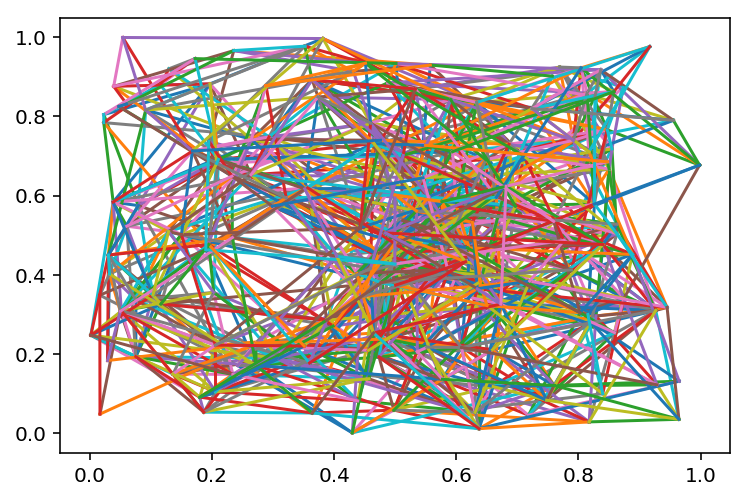

In [244]:
sl = [0,2]
plot(*pts[edg].T[sl])
show()

In [245]:
net = n3.netRads(pts[pt],edg1)


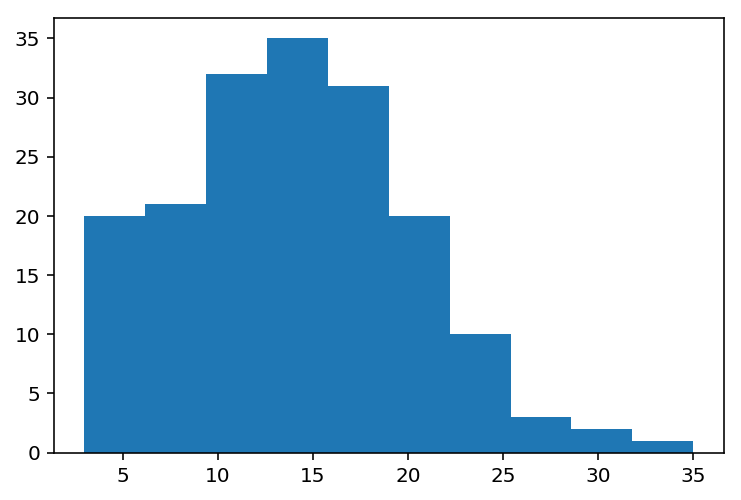

In [313]:
h = hist(net.degrees,10)

In [208]:
# net = n3.netRads(concatenate((pts,[[0]]*len(pts)),axis = 1),edg)
net = n3.netRads(pts[pt],edg1)

net.gnam += '-2d-geometric-2d'
print net.gnam
net.pts = concatenate((net.pts,[[0]]*len(net.pts)),axis = 1)
net.save('../../output/rebuttal/')

net-n74-L155-2d-geometric-2d


dt(s) = 0.669


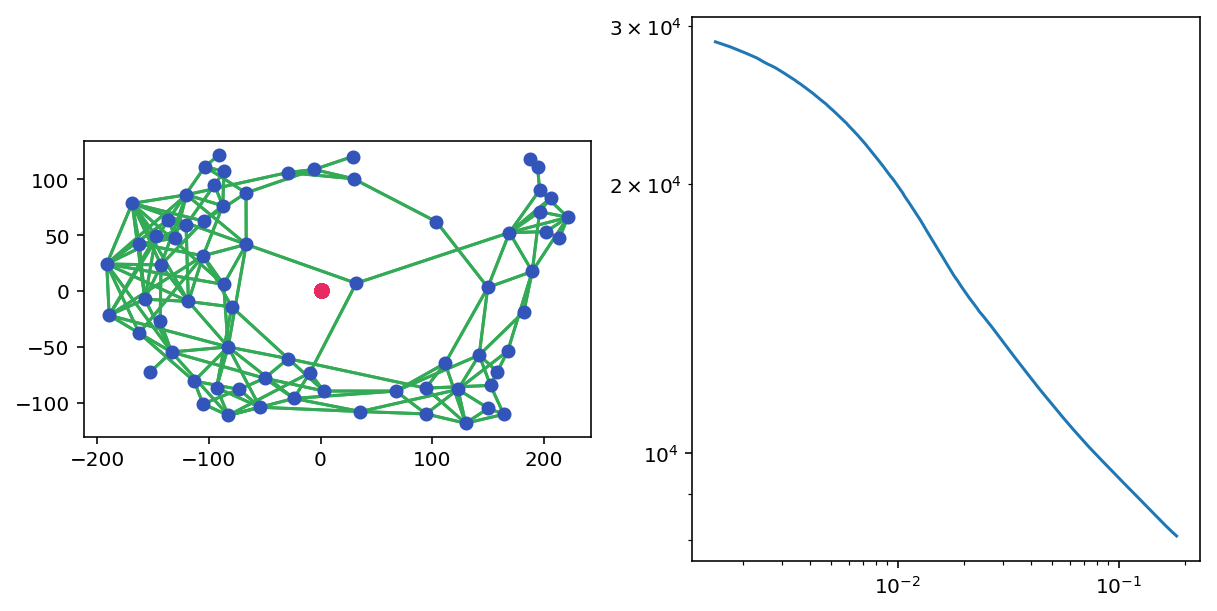

Beginning convergence check ...
dt(s) = 0.671


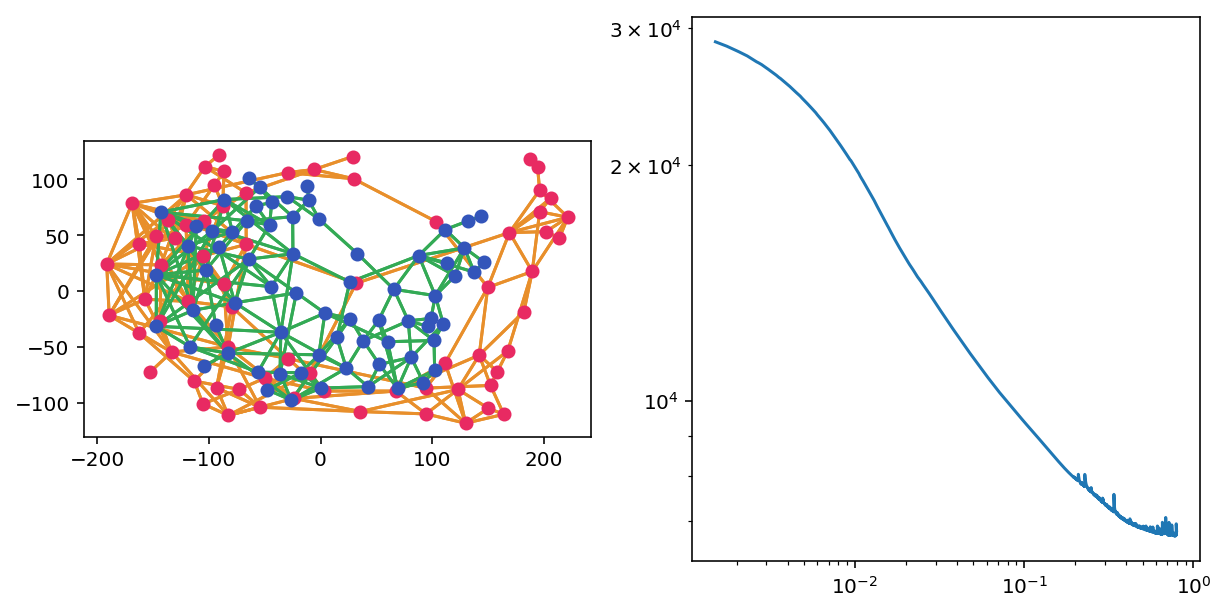


2000) ct=2.6,  Has Not Converged! dlog<l>/dlog(t)~-0.105 
Checks: (True, True, False)
dt(s) = 0.653


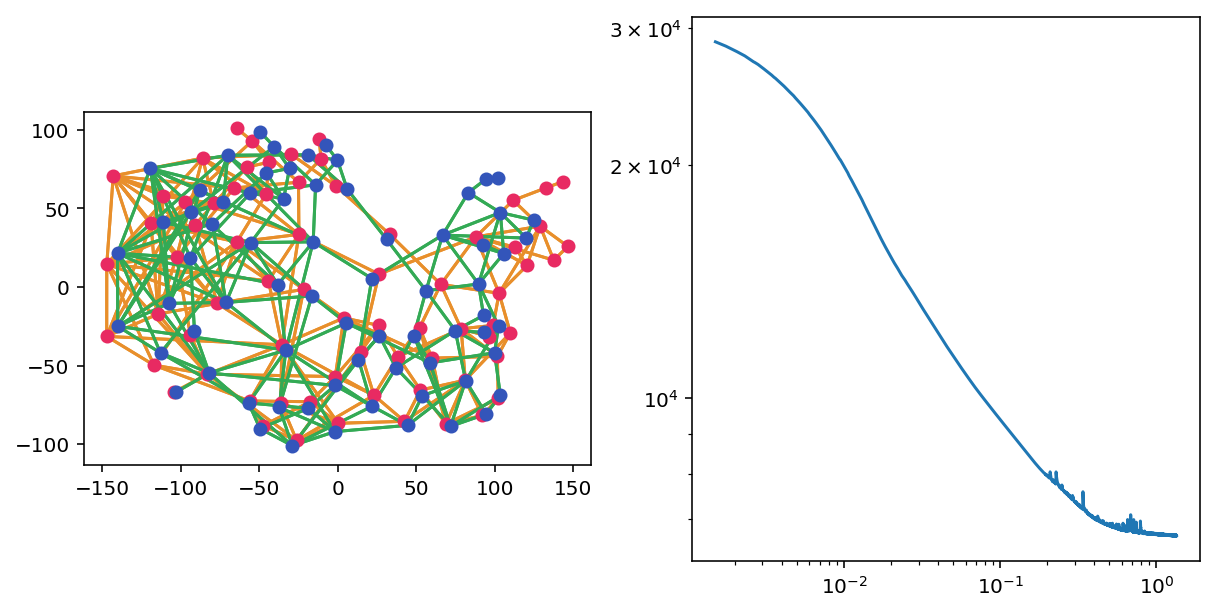


3000) ct=1.7,  Has Not Converged! dlog<l>/dlog(t)~-0.00787 
Checks: (False, False, False)
dt(s) = 0.661


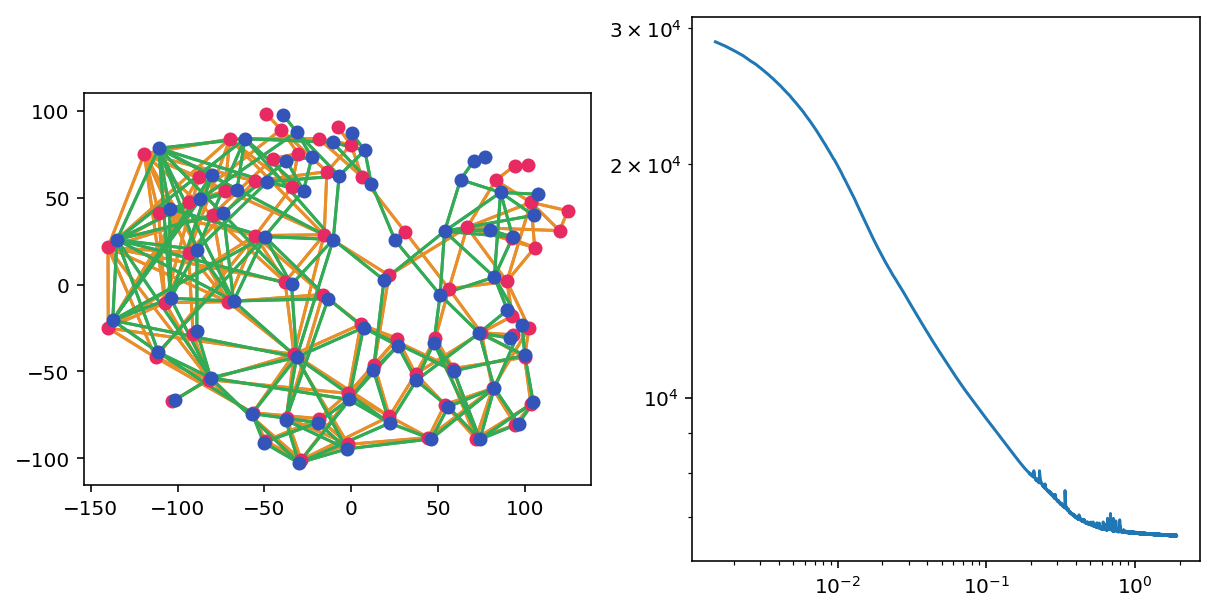


4000) ct=1.6,  Has Not Converged! dlog<l>/dlog(t)~0.0241 
Checks: (False, False, True)
dt(s) = 0.648


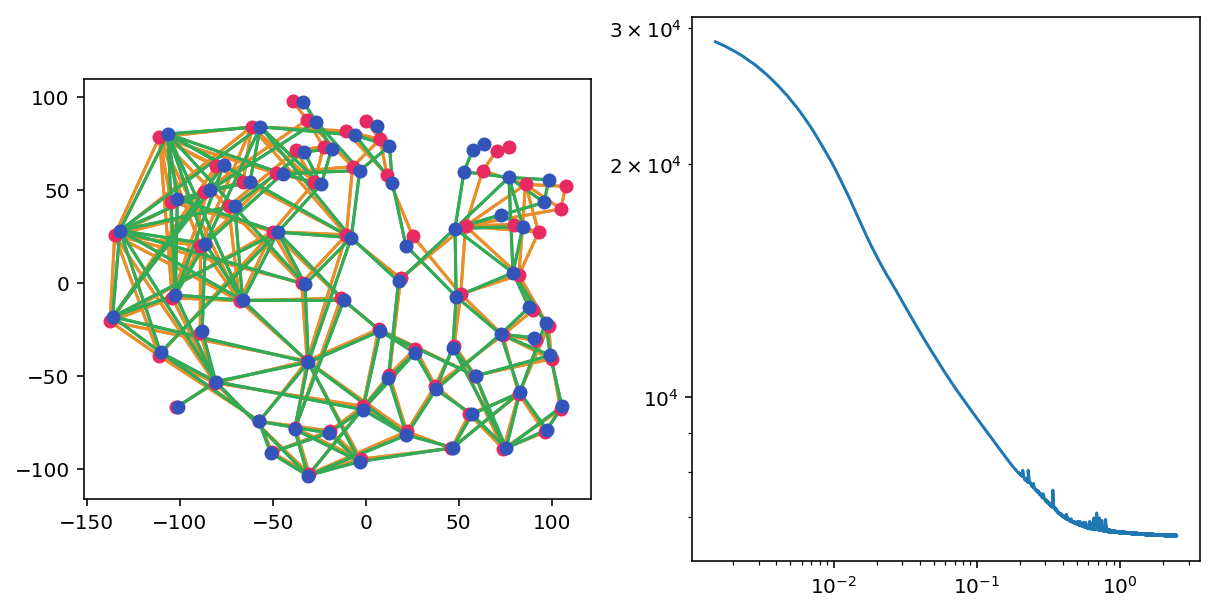


5000) ct=1.5,  Has Not Converged! dlog<l>/dlog(t)~0.0193 
Checks: (False, False, True)
dt(s) = 0.67


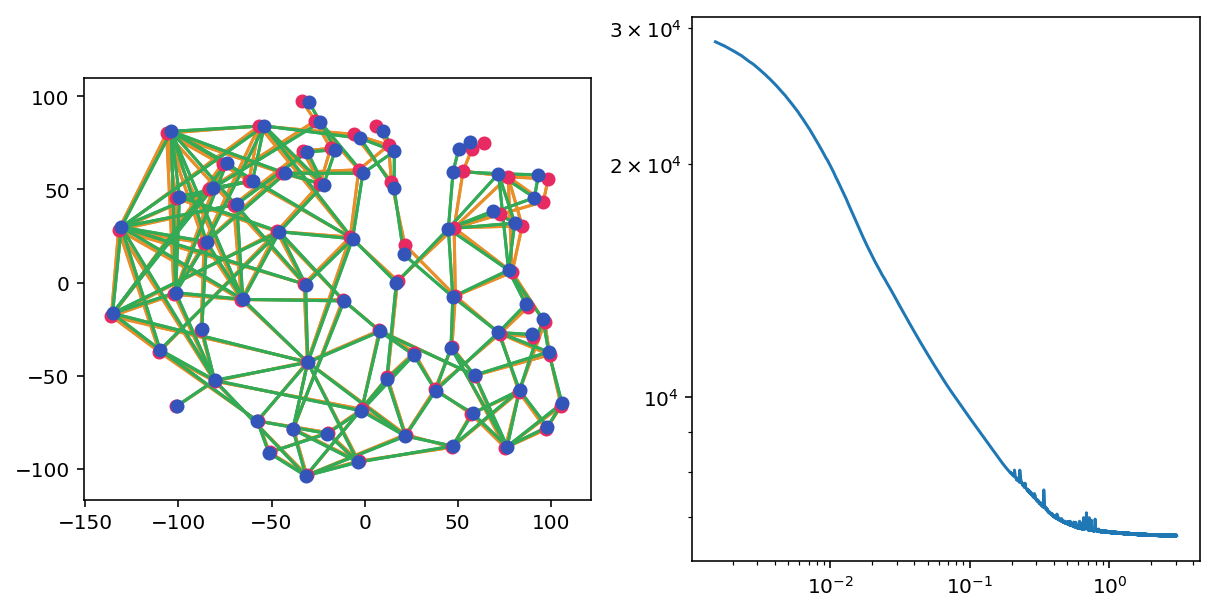


6000) ct=1.5,  Has Not Converged! dlog<l>/dlog(t)~0.0158 
Checks: (False, False, True)
dt(s) = 0.645


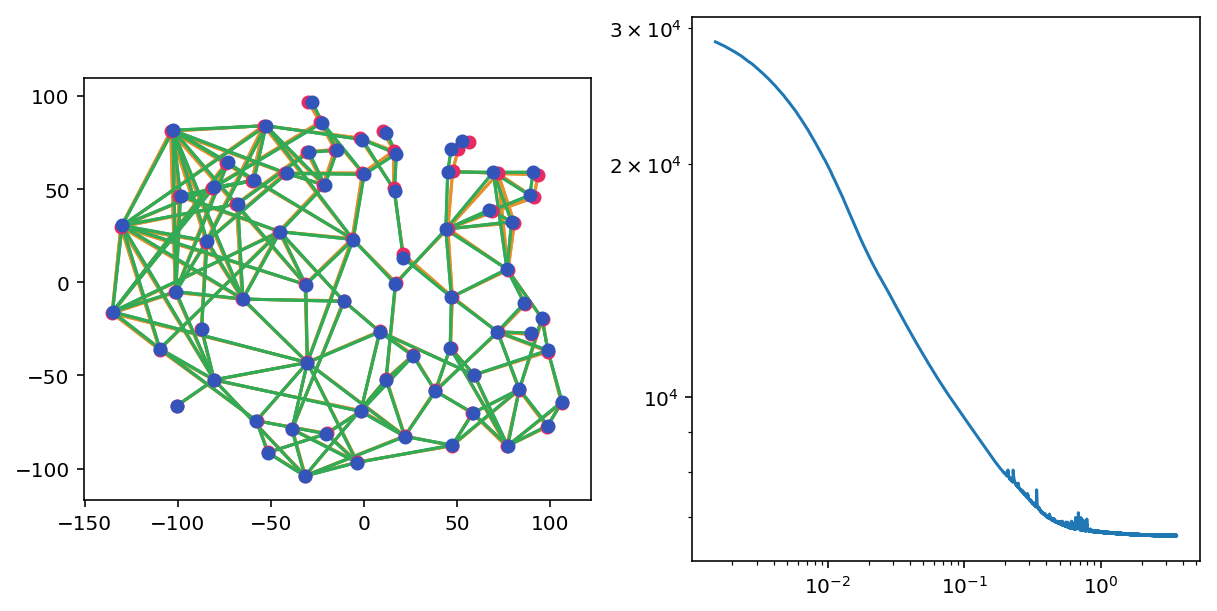


7000) ct=1.5,  Has Not Converged! dlog<l>/dlog(t)~0.0132 
Checks: (False, False, True)
dt(s) = 0.681


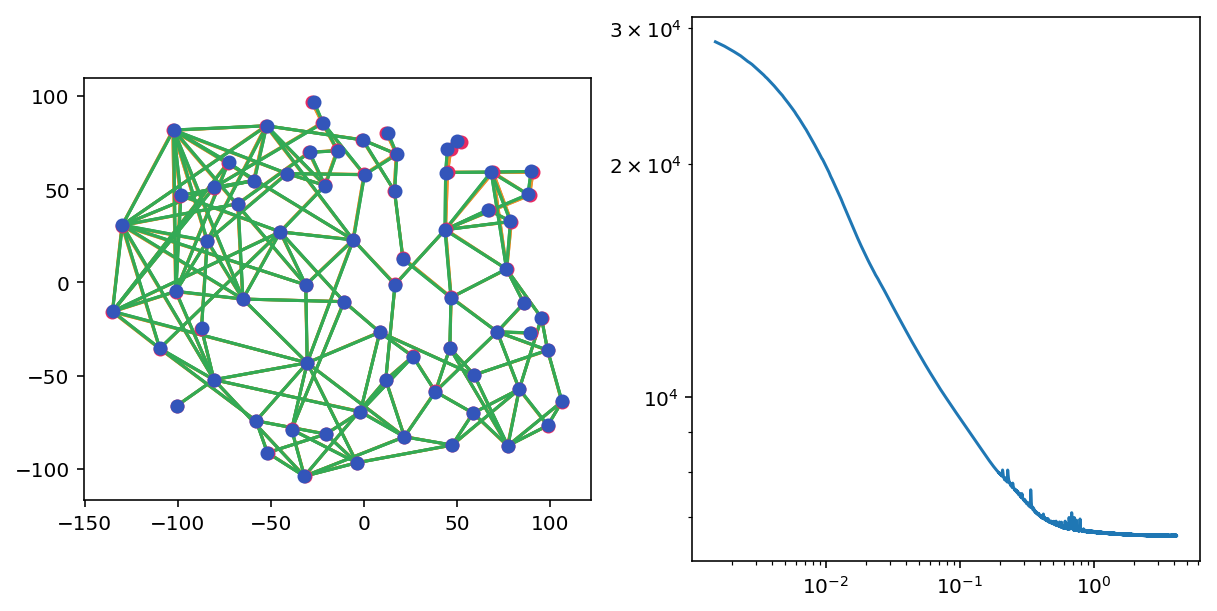


8000) ct=1.5,  Has Not Converged! dlog<l>/dlog(t)~0.0114 
Checks: (False, False, True)
dt(s) = 0.68


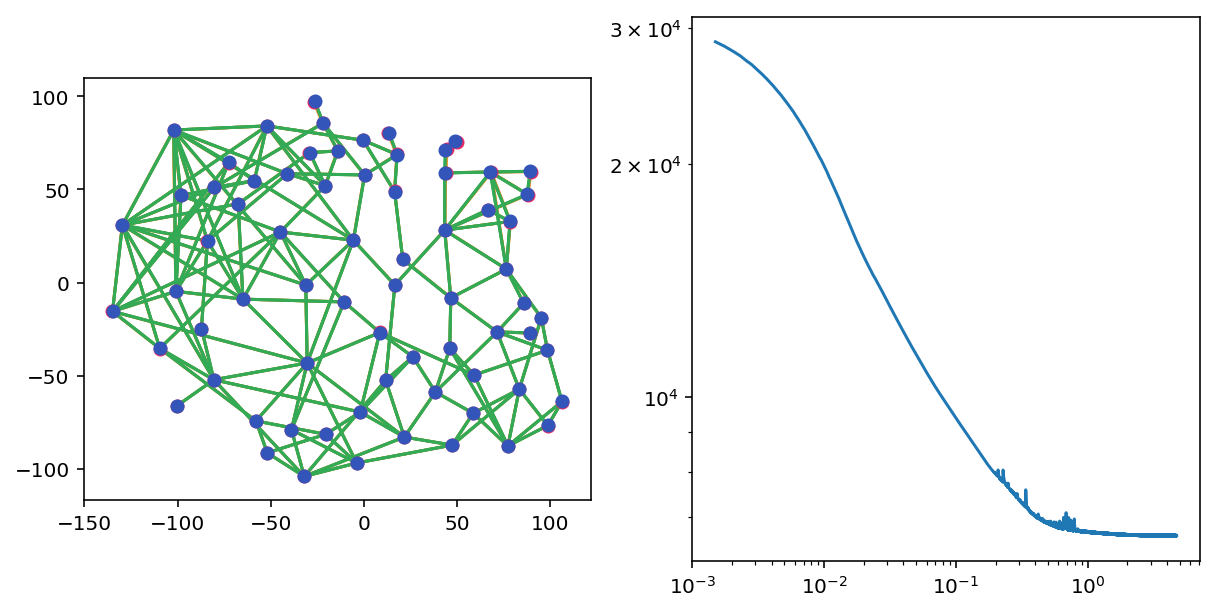


9000) ct=1.5,  Has Not Converged! dlog<l>/dlog(t)~0.00993 
Checks: (False, False, True)


KeyboardInterrupt: 

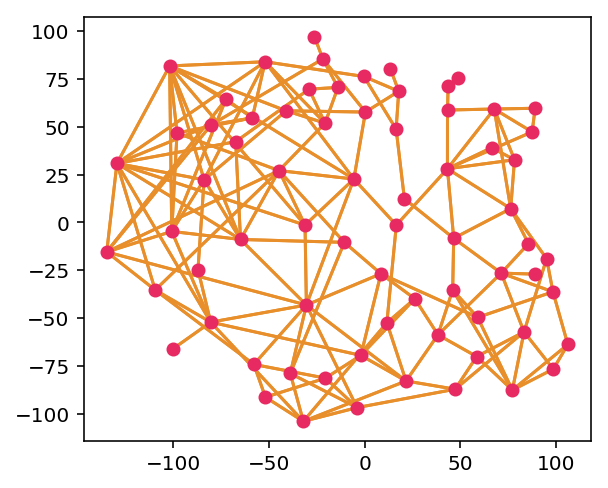

In [136]:
n3.iter_converge(net,max_its=10000)

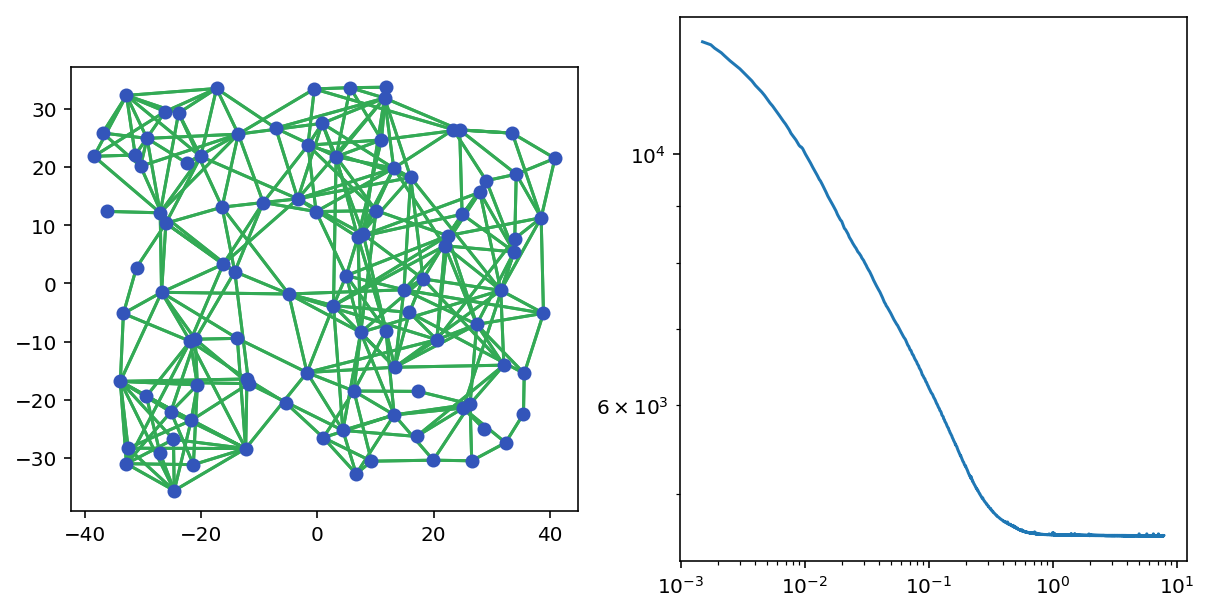

In [83]:
n3.draw_net_tv(net)

In [89]:
net.pts = concatenate((net.pts,[[0]]*len(net.pts)),axis = 1)
net.save('../../output/rebuttal/')

In [165]:
net.gnam

'net-n70-L312-2d-geometric-2d'

In [164]:
net.JSON['nodes']['positions']

[[0.45235467450920763, 0.06988781121342336, 0.0],
 [0.9630383910624287, 0.8767531986295788, 0.0],
 [0.14381616655778962, 0.5820685916287445, 0.0],
 [0.669322101000829, 0.4592968132501418, 0.0],
 [0.20627398877349878, 0.5321128924422471, 0.0],
 [0.970467856413052, 0.7759609409809948, 0.0],
 [0.7976167033877819, 0.3019314537500354, 0.0],
 [0.18788716002299477, 0.9506494837056163, 0.0],
 [0.5492226033035191, 0.06716689179290802, 0.0],
 [0.8599285961489346, 0.13299924344072023, 0.0],
 [0.8743905452289462, 0.4045331806456799, 0.0],
 [0.9612564901456222, 0.3653015158379662, 0.0],
 [0.9783767471525936, 0.975031339920457, 0.0],
 [0.5589026760059931, 0.04836660249454727, 0.0],
 [0.07183136139556967, 0.5729522612658532, 0.0],
 [0.8957751232128915, 0.07109867383513557, 0.0],
 [0.9021615974268341, 0.7224710181867418, 0.0],
 [0.6873825252422755, 0.8696684538571867, 0.0],
 [0.12172424742567278, 0.6199875044263493, 0.0],
 [0.6297597421924014, 0.7472882991846816, 0.0],
 [0.26348785039447864, 0.8113623

In [75]:
mkdir ../../output/rebuttal

In [85]:
1+1

2

In [91]:
fnam = '../../output/rebuttal/net-n100-L598-2d-geometric-2d.json'

In [96]:
f = lambda s: int(fnam.split('.json')[0].split('-'+s)[1].split('-')[0]) 

In [99]:
n,m = f('n'),f('L')

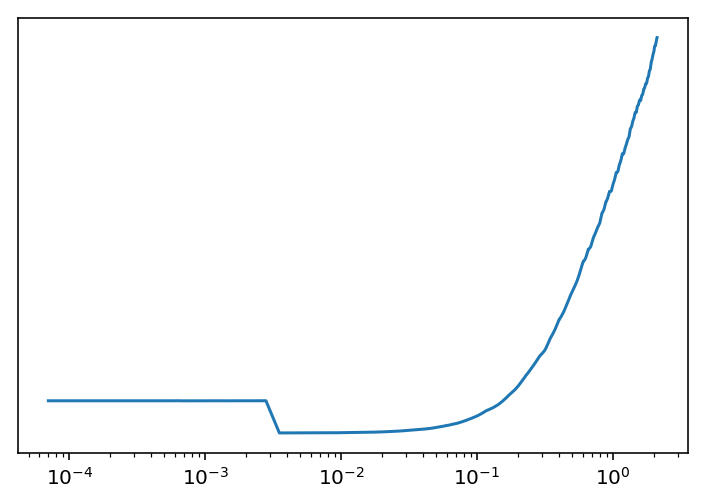

In [162]:
tv = loadtxt('../../output/rebuttal/net-n70-L312-th-r0.00233-segs15-ka42.9-fixed-tv.txt')
loglog(*tv.T)

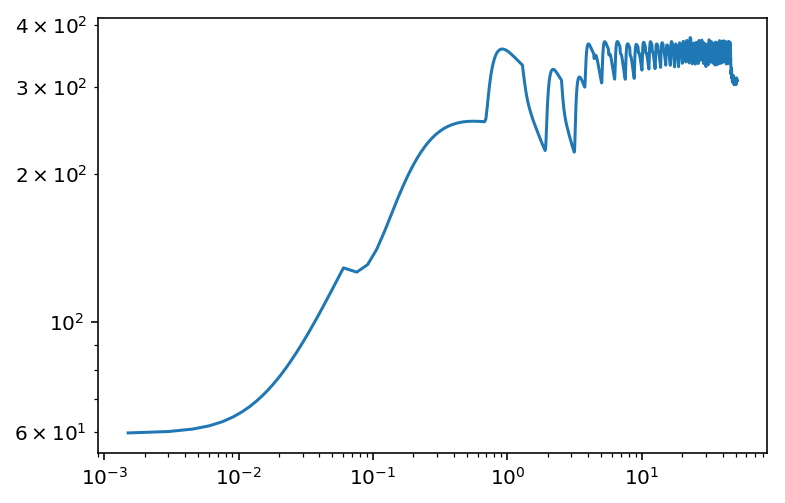

In [163]:
tv = loadtxt('../../output/rebuttal/net-n70-L312-th-r0.0503-segs15-ka1.99-fixed-tv.txt')
loglog(*tv.T)

In [209]:
import os

In [322]:
pth = '../../output/rebuttal/'
l = [i for i in os.listdir(pth) \
   if '.txt' in i and '-n74-L155' in i and 'th-' in i and 'segs100' not in i]
l

['net-n74-L155-th-r1.57-segs15-ka0.0637-fixed-tv.txt',
 'net-n74-L155-th-r0.0727-segs15-ka1.38-fixed-tv.txt',
 'net-n74-L155-th-r12.1-segs15-ka0.00826-fixed-tv.txt',
 'net-n74-L155-th-r0.563-segs15-ka0.178-fixed-tv.txt',
 'net-n74-L155-th-r0.0261-segs15-ka3.83-fixed-tv.txt',
 'net-n74-L155-th-r0.00337-segs15-ka29.7-fixed-tv.txt',
 'net-n74-L155-th-r4.36-segs15-ka0.0229-fixed-tv.txt',
 'net-n74-L155-th-r0.00938-segs15-ka10.7-fixed-tv.txt',
 'net-n74-L155-th-r33.7-segs15-ka0.00297-fixed-tv.txt',
 'net-n74-L155-th-r0.202-segs15-ka0.495-fixed-tv.txt']

In [323]:
tv[-100:].mean(0)

array([ 231.44724335,  366.83493774])

net-n74-L155-th-r1.57-segs15-ka0.0637-fixed-tv.txt


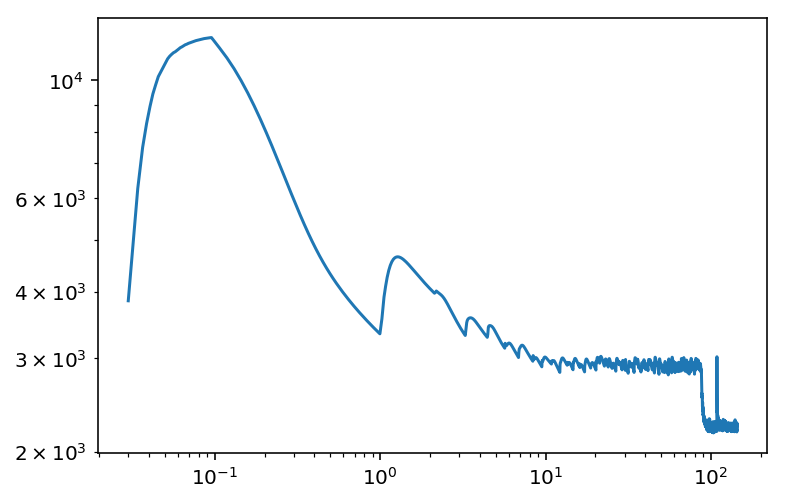

net-n74-L155-th-r0.0727-segs15-ka1.38-fixed-tv.txt


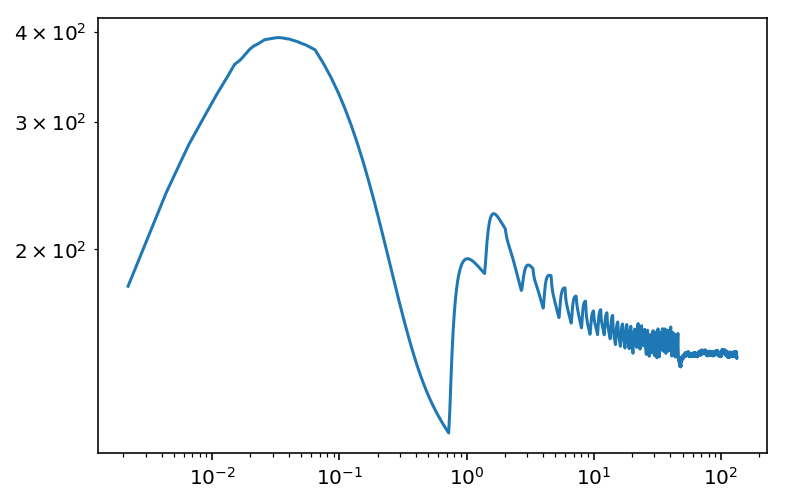

net-n74-L155-th-r12.1-segs15-ka0.00826-fixed-tv.txt


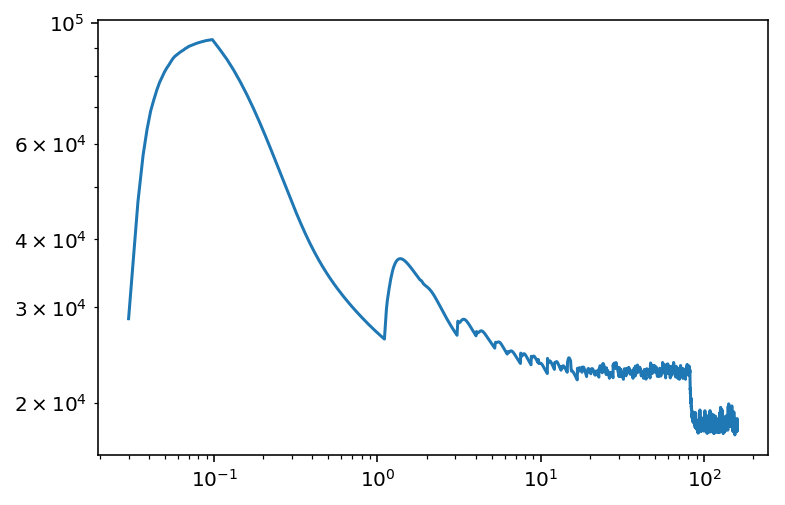

net-n74-L155-th-r0.563-segs15-ka0.178-fixed-tv.txt


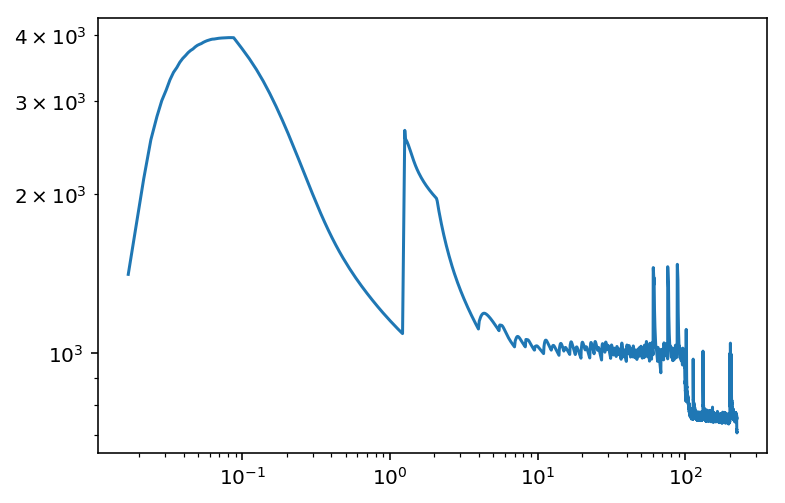

net-n74-L155-th-r0.0261-segs15-ka3.83-fixed-tv.txt


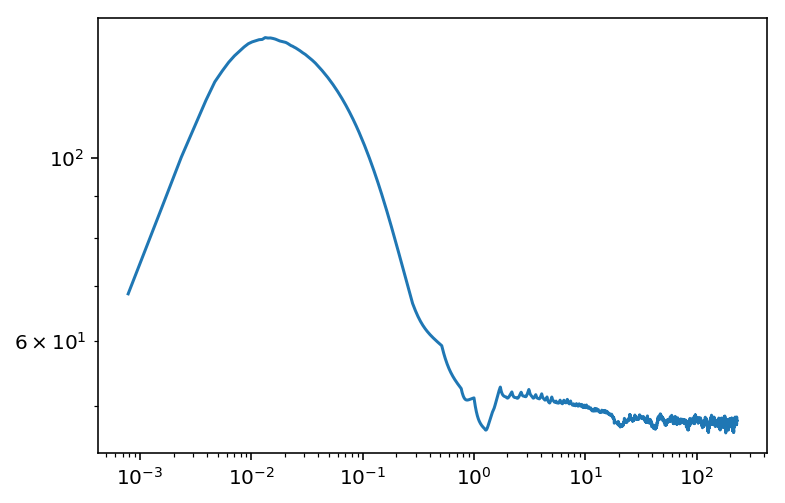

net-n74-L155-th-r0.00337-segs15-ka29.7-fixed-tv.txt


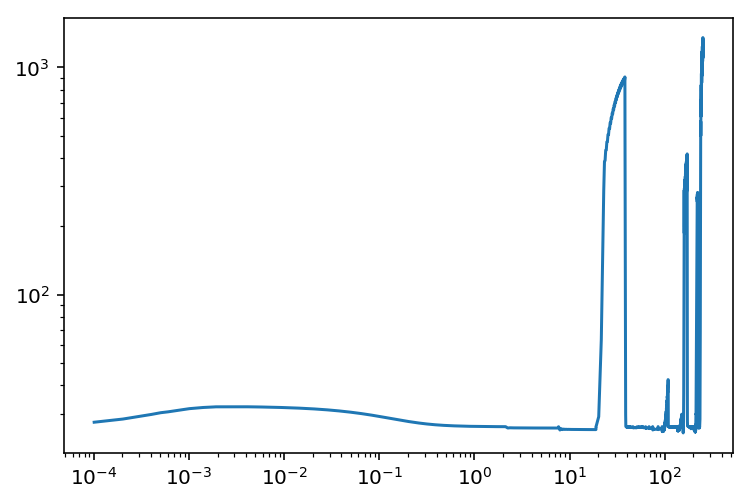

net-n74-L155-th-r4.36-segs15-ka0.0229-fixed-tv.txt


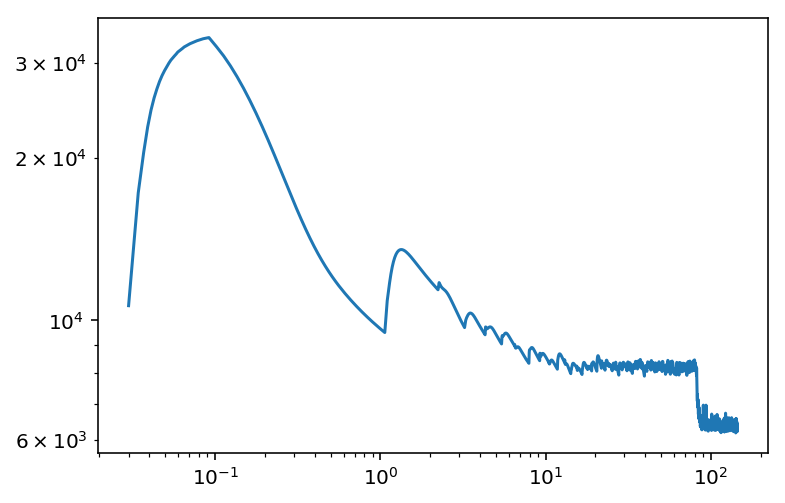

net-n74-L155-th-r0.00938-segs15-ka10.7-fixed-tv.txt


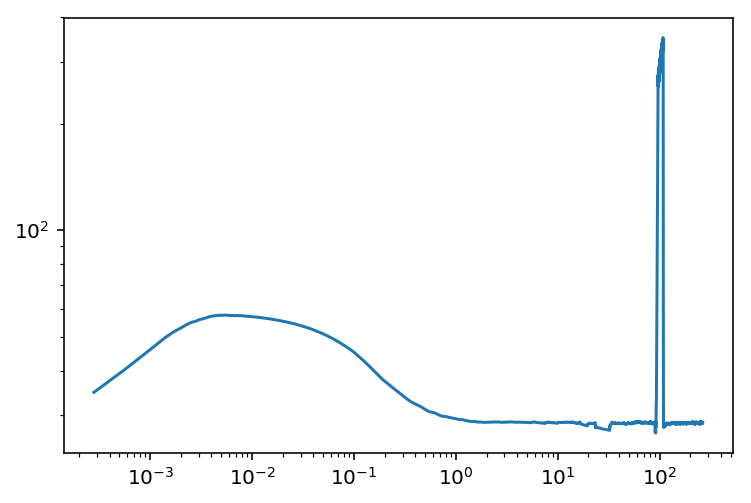

net-n74-L155-th-r33.7-segs15-ka0.00297-fixed-tv.txt


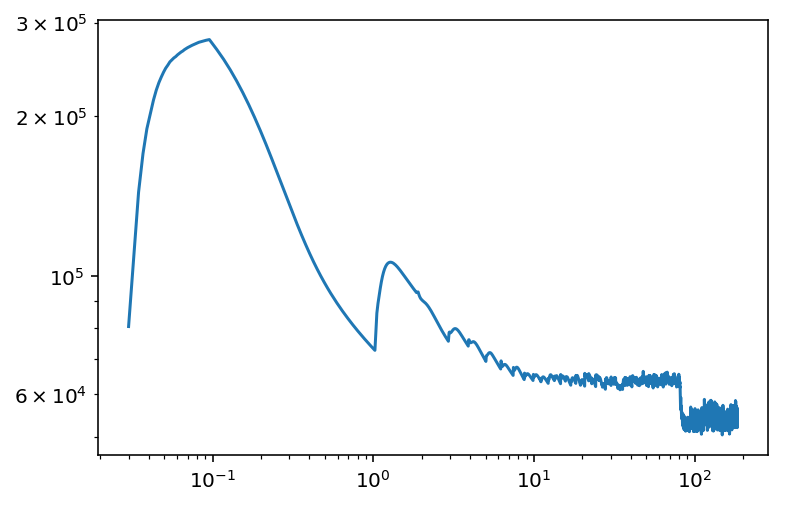

net-n74-L155-th-r0.202-segs15-ka0.495-fixed-tv.txt


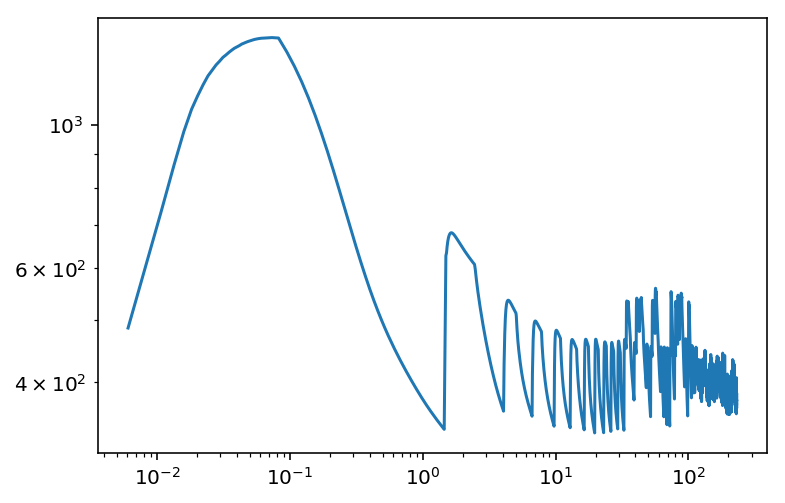

In [328]:
tvl = []
for i in l:
    print i
    tv = loadtxt(pth+i)
    tvl += [tv[-100:].mean(0)]
    loglog(*tv[:].T)
    show()
    
tvl = array(tvl)

In [325]:
th = array([float(i.split('-th-r')[1].split('-seg')[0]) for i in l]) 

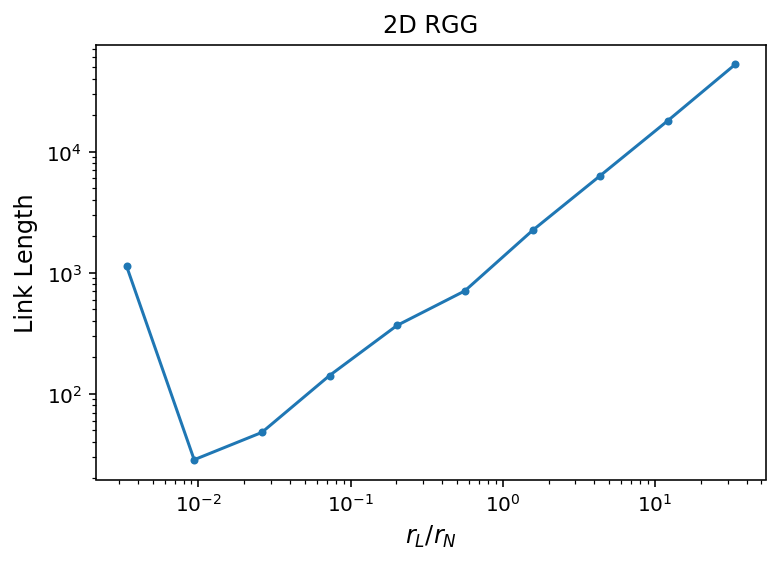

In [326]:
ix = argsort(th)
loglog(th[ix], tvl[ix,1],'.-')
title('2D RGG')
xlabel(r'$r_L/r_N$',fontsize=12)
ylabel(r'Link Length',fontsize=12)
savefig('./2d-RGG.png',dpi = 300)

In [280]:
2

2